# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [1]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

Shape of training data: (50000, 32, 32, 3)
Shape of test data: (10000, 32, 32, 3)
Shape of training labels: (50000, 1)
Shape of test labels: (10000, 1)
Number of classes: 100
Image dimensions: 32x32 with 3 channels


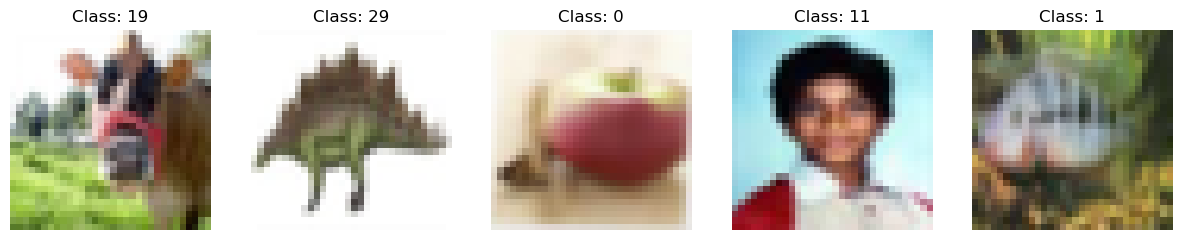

In [2]:
import matplotlib.pyplot as plt
import numpy as np
# Explore the dataset
print("Shape of training data:", x_train.shape)
print("Shape of test data:", x_test.shape)
print("Shape of training labels:", y_train.shape)
print("Shape of test labels:", y_test.shape)

# Get the number of unique classes
num_classes = len(np.unique(y_train))
print("Number of classes:", num_classes)

# Dimensions of images
img_height, img_width, img_channels = x_train.shape[1:]
print(f"Image dimensions: {img_height}x{img_width} with {img_channels} channels")

# Show a few examples from the training set
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    axes[i].imshow(x_train[i])
    axes[i].set_title(f"Class: {y_train[i][0]}")
    axes[i].axis('off')
plt.show()

### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [3]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# 1. Normalize the images (pixel values range [0, 1])
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 2. One-hot encode the labels
y_train = to_categorical(y_train, num_classes=100)
y_test = to_categorical(y_test, num_classes=100)

# 3. Split the training set into training and validation sets (80%-20% split)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Display the shapes of the datasets
print("Training data shape:", x_train.shape)
print("Validation data shape:", x_val.shape)
print("Test data shape:", x_test.shape)
print("Training labels shape:", y_train.shape)
print("Validation labels shape:", y_val.shape)
print("Test labels shape:", y_test.shape)

Training data shape: (40000, 32, 32, 3)
Validation data shape: (10000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)
Training labels shape: (40000, 100)
Validation labels shape: (10000, 100)
Test labels shape: (10000, 100)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


# Create the updated baseline CNN model
model = Sequential([
    # 1st Convolutional Block
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    # 2nd Convolutional Block
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    # 3rd Convolutional Block
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    # 4th Convolutional Block
    Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten and Fully Connected Layers
    Flatten(),
    Dense(256, activation='relu'),
    Dense(100, activation='softmax')  # Output layer for 100 classes
])

# Print the model summary
model.summary()

/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 676,516 (2.58 MB)

 Trainable params: 676,516 (2.58 MB)

 Non-trainable params: 0 (0.00 B)

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different. 
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> Categorical crossentropy
- <b>Optimizer:</b> Adam

In [5]:
from keras import optimizers
from keras.optimizers import Adam

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),  # Optimizer
    loss='categorical_crossentropy',     # Loss function
    metrics=['accuracy']                 # Evaluation metric
)

Adam is widely used in deep learning problems, especially for vision tasks, due to its consistent performance across various architectures and datasets. Adam (Adaptive Moment Estimation) dynamically adjusts the learning rates for each parameter based on the first and second moments of the gradients. This adaptability is particularly helpful when dealing with complex datasets like images, where different features may require different optimization speeds. It converges faster in terms of computational efficiency compared to other optimizers like SGD, especially in high-dimensional spaces such as those found in image classification problems. Adam is less sensitive to hyperparameter choices, making it a good starting point for experimentation. It often performs well "out of the box" with its default parameters (e.g., learning rate = 0.001).


Categorical crossentropy works seamlessly with the softmax activation function in the output layer, ensuring that the model's predictions represent a valid probability distribution. This loss emphasizes the probability assigned to the correct class while ignoring other classes, which is exactly what we want for a classification task. In this problem, the CIFAR-100 dataset has 100 classes. Categorical crossentropy is designed for multi-class classification tasks where the target labels are one-hot encoded.


## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [6]:
# Train the model
history = model.fit(
    x_train, y_train,                   # Training data
    validation_data=(x_val, y_val),     # Validation data
    epochs=20,                          # Number of epochs
    batch_size=32,                      # Batch size
    verbose=1                           # Display progress
)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.0410 - loss: 4.3046 - val_accuracy: 0.1421 - val_loss: 3.5988
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.1863 - loss: 3.3676 - val_accuracy: 0.2333 - val_loss: 3.1188
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 20ms/step - accuracy: 0.2698 - loss: 2.9099 - val_accuracy: 0.2737 - val_loss: 2.8978
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.3432 - loss: 2.5636 - val_accuracy: 0.3253 - val_loss: 2.6735
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.3946 - loss: 2.2927 - val_accuracy: 0.3382 - val_loss: 2.6317
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.4508 - loss: 2.0459 - val_accuracy: 0.3445 - val_loss: 2.6039
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 206s 165ms/step - accuracy: 0.5076 - loss: 1.8023 - val_accuracy: 0.3580 - val_loss: 2.6628
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 20ms/step - accuracy: 0.5576

I experimented with 20 and 60 epochs initially, and the training accuracy improved from 37% to 62% after 20 epochs, and to 81% after 60 epochs. However, validation accuracy remained the same, around 35%. I decided to keep the number of epochs at 20 to preserve the energy and reduce learning time, since additional epochs do not lead to improved learning and only contribute to overfitting. In case the model performance will improve significantly with model adjustments, I decided to keep 20 epochs to make sure it will be sufficient to train the more advanced model, with more visibility on model behaviour. Even though an epoch of 12-15 would be suitable to maximize energy and time efficiency in this case.

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> 32.5%
- <b>Other metric:</b> F1 score
- <b>Reason for selection:</b> The F1 score is a metric that combines both precision and recall into a single score, which is particularly useful for imbalanced class distributions. The F1 score is the harmonic mean of precision and recall, where:

Precision is the fraction of relevant instances among the retrieved instances (True Positives / (True Positives + False Positives)).
Recall is the fraction of relevant instances that have been retrieved over the total amount of relevant instances (True Positives / (True Positives + False Negatives)).
- <b>Value of metric:</b> 32%
- <b>Interpretation of metric value:</b> An F1 score of 32% indicates that the model's performance in terms of balancing precision and recall is relatively low. The model is not performing well in terms of both precision and recall. This can be explained by imbalanced dataced, wrong model complexity, or inappropriate hyperparameters.

In [7]:
from sklearn.metrics import f1_score
import numpy as np

# Predict the classes on the test set
y_pred_classes = model.predict(x_test, verbose=1)
y_pred_classes = np.argmax(y_pred_classes, axis=1)

# If y_test is one-hot encoded, convert it to class labels
y_true = np.argmax(y_test, axis=1)  # In case y_test is one-hot encoded

# Calculate the F1 score for each class (micro average, macro average, etc.)
f1 = f1_score(y_true, y_pred_classes, average='macro')  # or 'weighted', 'micro', 'samples', etc.

print(f'F1 Score (Macro Average): {f1:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
F1 Score (Macro Average): 0.3209


In [8]:
from sklearn.metrics import classification_report

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Get predictions for the test set
y_pred = model.predict(x_test, verbose=1)
y_pred_classes = y_pred.argmax(axis=1)
y_true = y_test.argmax(axis=1)

# Generate a classification report
report = classification_report(y_true, y_pred_classes, digits=4)
print(report)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3297 - loss: 5.9519
Test Accuracy: 0.3256
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
              precision    recall  f1-score   support

           0     0.5934    0.5400    0.5654       100
           1     0.4045    0.3600    0.3810       100
           2     0.2473    0.2300    0.2383       100
           3     0.1644    0.1200    0.1387       100
           4     0.1478    0.1700    0.1581       100
           5     0.1979    0.3700    0.2578       100
           6     0.4464    0.2500    0.3205       100
           7     0.4110    0.3000    0.3468       100
           8     0.4828    0.2800    0.3544       100
           9     0.4500    0.4500    0.4500       100
          10     0.1781    0.1300    0.1503       100
          11     0.2051    0.1600    0.1798       100
          12     0.2714    0.3800    0.3167       100
          13     0.2595    0.4100    0.3178       100
          14     0.2278    0.1800    0.2011       1

### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

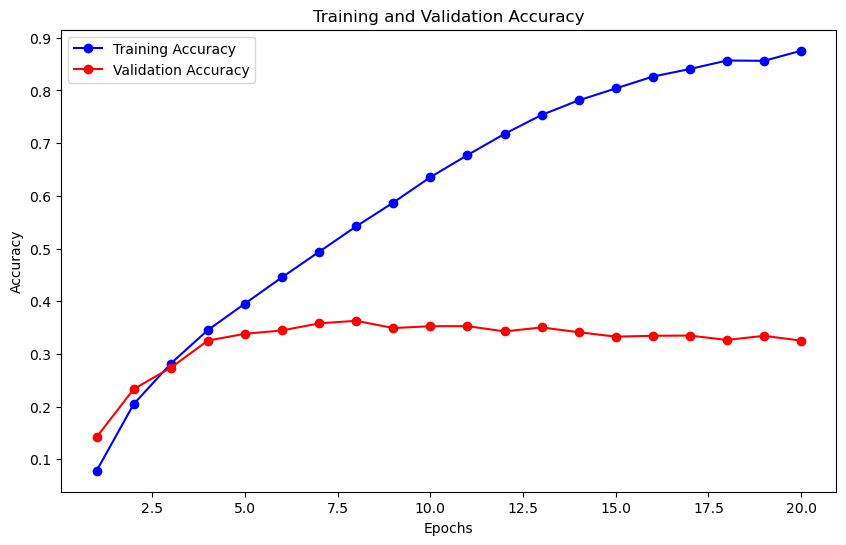

In [9]:
import matplotlib.pyplot as plt

# Extract training and validation accuracy from history
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
epochs = range(1, len(training_accuracy) + 1)

# Plot the accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


The plot shows that the model starts overfitting after epoch 8. While training set accuracy continues improving with more epochs, validation loss and accuracy remain the same, or start getting worse, after epoch 8. Validation accuracy is dropping and log loss has increased. 

This is indicative of either a model that isn't suitable for such task, the data provided being too complex, wrong hyperparameters, inappropriate model initialization, or a combination of those factors.

Further model improvement can be done with other techniques. I have tried a simplier model with less layers, and it led to lower accuracy. That experiment showed me, that I should consider improving the model with more hidden layers, introducing dropout to use less neurons during training phase and reduce overfitting, use data augmentation, use pre-trained models, adjust learning rate and initialization, etc.

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


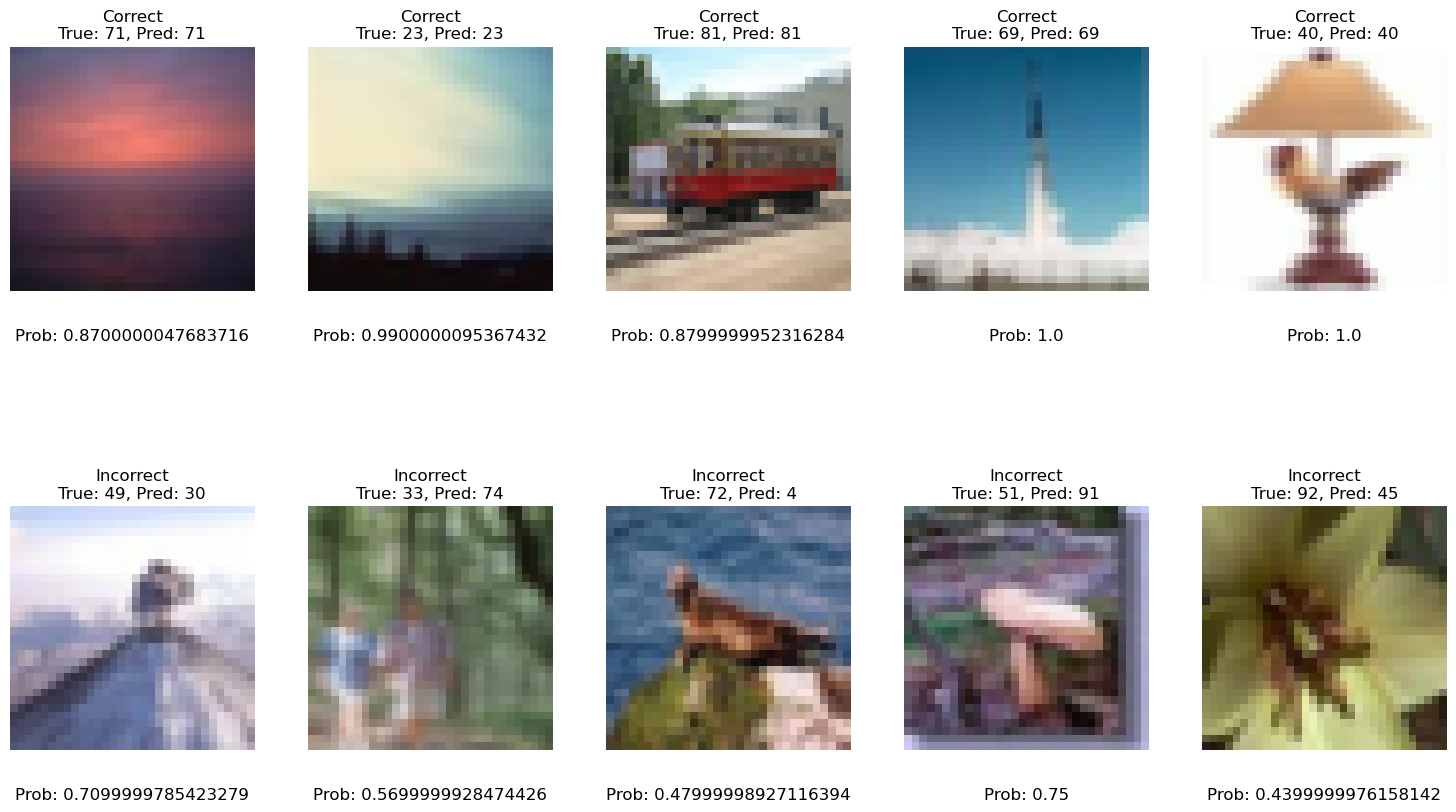

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Get predictions for the test set
y_pred = model.predict(x_test, verbose=1)
y_pred_classes = y_pred.argmax(axis=1)
y_true = y_test.argmax(axis=1)

# Find correctly classified image indices
correct_indices = np.where(y_pred_classes == y_true)[0]

# Find incorrectly classified image indices
incorrect_indices = np.where(y_pred_classes != y_true)[0]

# Select 5 correct and 5 incorrect images
correct_images = correct_indices[:5]
incorrect_images = incorrect_indices[:5]

# Plot the correctly classified images
plt.figure(figsize=(15, 10))

for i, idx in enumerate(correct_images):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[idx])
    # Title with class numbers
    plt.title(f"Correct\nTrue: {y_true[idx]}, Pred: {y_pred_classes[idx]}")
    # Extract the probability of the predicted class
    predicted_prob = y_pred[idx][y_pred_classes[idx]]
    # Show the probability below the class numbers
    plt.text(0.5, -0.15, f"Prob: {np.round(predicted_prob, 2)}", ha='center', va='top', fontsize=12, transform=plt.gca().transAxes)
    plt.axis('off')

# Plot the incorrectly classified images
for i, idx in enumerate(incorrect_images):
    plt.subplot(2, 5, i+6)
    plt.imshow(x_test[idx])
    # Title with class numbers
    plt.title(f"Incorrect\nTrue: {y_true[idx]}, Pred: {y_pred_classes[idx]}")
    # Extract the probability of the predicted class
    predicted_prob = y_pred[idx][y_pred_classes[idx]]
    # Show the probability below the class numbers
    plt.text(0.5, -0.15, f"Prob: {np.round(predicted_prob, 2)}", ha='center', va='top', fontsize=12, transform=plt.gca().transAxes)
    plt.axis('off')

plt.tight_layout()
plt.show()





By looking at these photos, the incorrectly labeled images can be confusing, and the probabilities for them tend to be lower than for correctly labeled ones. The correctly labeled images are more clear and easy to recognize, which is indicative of a somewhat functioning model that has learned, at least to some extent.

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

I will implement Dropout as an advanced technique to improve the model’s performance. Dropout is a popular regularization method that can help reduce overfitting, especially in deep neural networks. It is essentially skipping neurons randomly, 25% of them in this case. I have tried 50% and received a somewhat worse performance in terms of model's learning ability. With less neurons participating in model training, while randomizing their selection, dropout reduces overfitting. This method seems suitable in this case, given how the model is overfitting before reaching significant accuracy on validation set. 

Randomly skipping neurons in the model during training will generalize the learning results and make the model more suitable to classify the test set of data. Given the significant overfitting present, I went ahead with a 25% rate for dropout in 2 hidden layers. The selected dropout rate seems to be appropriate, since the training accuracy and validation accuracy became much closer to each other, while the model accuracy improved.

In [17]:
from keras.layers import Dropout

# Redefine the model with Dropout layers
model_with_dropout = Sequential()

# Add convolutional layers with Dropout
model_with_dropout.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_with_dropout.add(MaxPooling2D((2, 2)))
model_with_dropout.add(Dropout(0.25))  # Dropout added

model_with_dropout.add(Conv2D(64, (3, 3), activation='relu'))
model_with_dropout.add(MaxPooling2D((2, 2)))
model_with_dropout.add(Dropout(0.25))  # Dropout added

model_with_dropout.add(Conv2D(128, (3, 3), activation='relu'))
model_with_dropout.add(MaxPooling2D((2, 2)))

# Flatten and add dense layers with Dropout
model_with_dropout.add(Flatten())
model_with_dropout.add(Dense(512, activation='relu'))
# Output layer
model_with_dropout.add(Dense(100, activation='softmax'))

# Compile the model
model_with_dropout.compile(optimizer=Adam(learning_rate=0.001), 
                           loss='categorical_crossentropy', 
                           metrics=['accuracy'])

# Model summary
model_with_dropout.summary()


/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        51,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,204 (1.55 MB)

 Trainable params: 407,204 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [18]:
# Train the model
history_dropout = model_with_dropout.fit(
    x_train, y_train,                   # Training data
    validation_data=(x_val, y_val),     # Validation data
    epochs=20,                          # Number of epochs
    batch_size=32,                      # Batch size
    verbose=1                           # Display progress
)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.0542 - loss: 4.2397 - val_accuracy: 0.1602 - val_loss: 3.5122
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.1871 - loss: 3.3833 - val_accuracy: 0.2391 - val_loss: 3.1088
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.2464 - loss: 3.0386 - val_accuracy: 0.2799 - val_loss: 2.9185
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.2965 - loss: 2.7958 - val_accuracy: 0.3030 - val_loss: 2.8263
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.3342 - loss: 2.6131 - val_accuracy: 0.3137 - val_loss: 2.7674
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.3614 - loss: 2.4662 - val_accuracy: 0.3194 - val_loss: 2.7619
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.3854 - loss: 2.3430 - val_accuracy: 0.3375 - val_loss: 2.6138
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.4148 -

We can see that adding dropout improved model's performance. The maximum validation accuracy increased from 32.5% to 37.4%. The max training accuracy reduced from 89.6% in previous model, to 59% in model with dropout, which made the two accuracies closer together in the dropout model. Moreover, the log loss increased from 2.8 to 5 between epoch 10 and 20 in the previous model, while in this one the minimum log loss of 2.57 can be seen in epoch 10, and it only increased to 2.87 in epoch 20, while some learning was done and validation accuracy continued increasing. This indicates reduced overfitting and better model learning.


In [22]:


# Predict the classes on the test set
y_pred_classes = model_with_dropout.predict(x_test, verbose=1)
y_pred_classes = np.argmax(y_pred_classes, axis=1)

# If y_test is one-hot encoded, convert it to class labels
y_true = np.argmax(y_test, axis=1)  # In case y_test is one-hot encoded

# Calculate the F1 score for each class (micro average, macro average, etc.)
f1_dropout = f1_score(y_true, y_pred_classes, average='macro')  # or 'weighted', 'micro', 'samples', etc.

print(f'F1 Score (Macro Average): {f1_dropout:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
F1 Score (Macro Average): 0.3631


In [21]:
from sklearn.metrics import classification_report

# Evaluate the model on the test set
test_loss, test_accuracy = model_with_dropout.evaluate(x_test, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Get predictions for the test set
y_pred = model_with_dropout.predict(x_test, verbose=1)
y_pred_classes = y_pred.argmax(axis=1)
y_true = y_test.argmax(axis=1)

# Generate a classification report
report_dropout = classification_report(y_true, y_pred_classes, digits=4)
print(report_dropout)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3637 - loss: 2.8939
Test Accuracy: 0.3663
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0     0.5794    0.7300    0.6460       100
           1     0.4274    0.5300    0.4732       100
           2     0.3294    0.2800    0.3027       100
           3     0.2424    0.1600    0.1928       100
           4     0.1807    0.1500    0.1639       100
           5     0.2281    0.2600    0.2430       100
           6     0.4356    0.4400    0.4378       100
           7     0.3265    0.4800    0.3887       100
           8     0.3061    0.4500    0.3644       100
           9     0.4800    0.4800    0.4800       100
          10     0.1720    0.2700    0.2101       100
          11     0.3514    0.1300    0.1898       100
          12     0.4400    0.3300    0.3771       100
          13     0.3519    0.1900    0.2468       100
          14     0.4110    0.3000    0.3468       1

Moreover, average model accuracy increased from 32.56% to 36.63%, and F1 score increased from 32.09% to 36.31%. This indicates of better model performance overall.

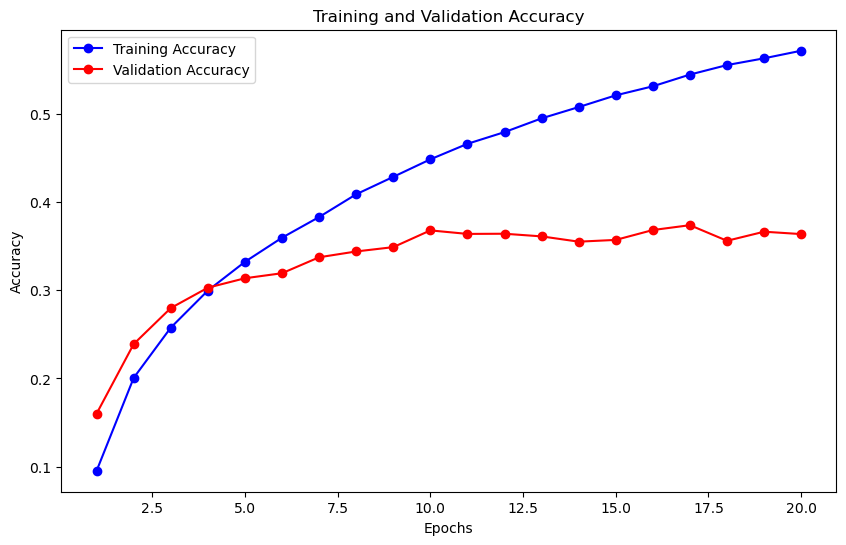

In [19]:
import matplotlib.pyplot as plt

# Extract training and validation accuracy from history
training_accuracy = history_dropout.history['accuracy']
validation_accuracy = history_dropout.history['val_accuracy']
epochs = range(1, len(training_accuracy) + 1)

# Plot the accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


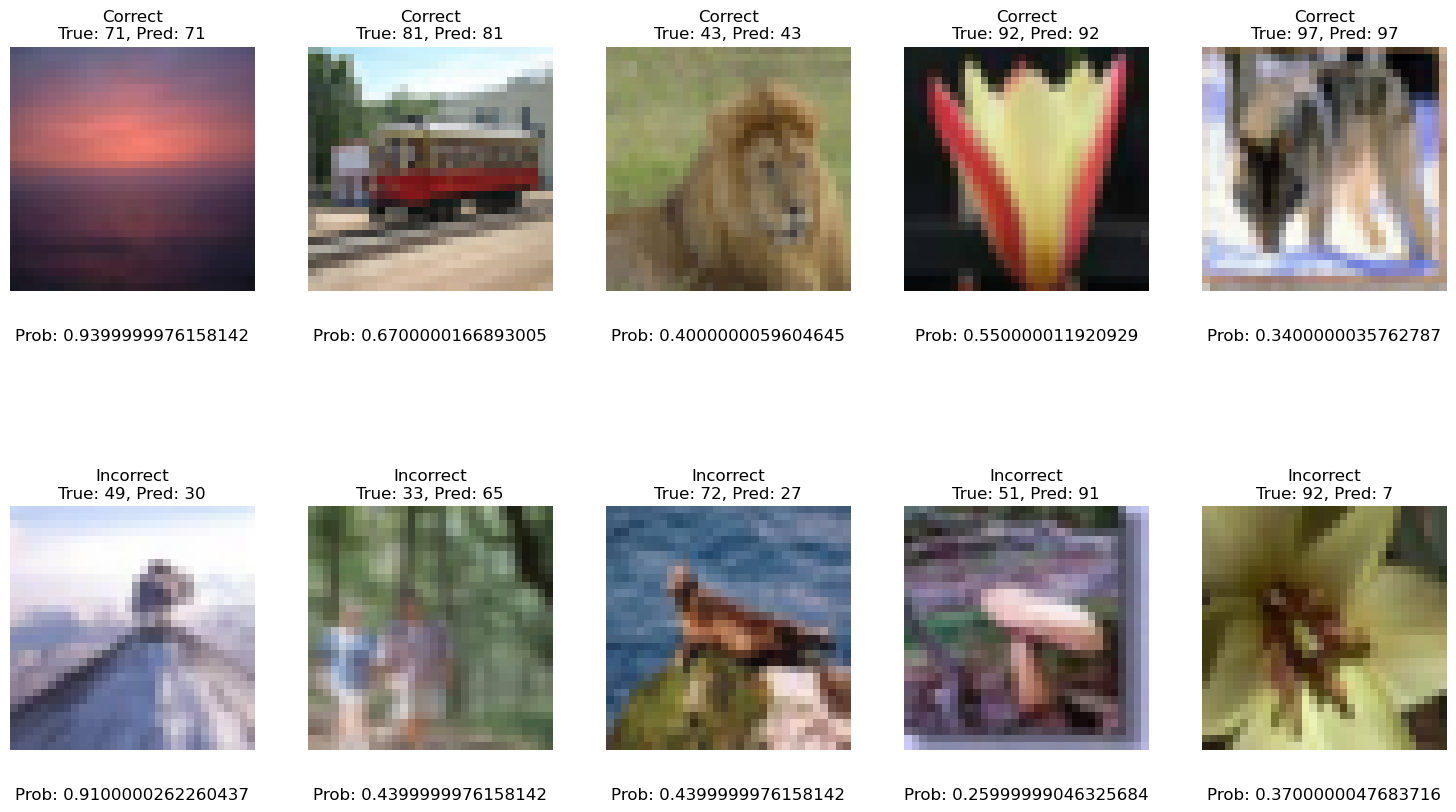

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Get predictions for the test set
y_pred = model_with_dropout.predict(x_test, verbose=1)
y_pred_classes = y_pred.argmax(axis=1)
y_true = y_test.argmax(axis=1)

# Find correctly classified image indices
correct_indices = np.where(y_pred_classes == y_true)[0]

# Find incorrectly classified image indices
incorrect_indices = np.where(y_pred_classes != y_true)[0]

# Select 5 correct and 5 incorrect images
correct_images = correct_indices[:5]
incorrect_images = incorrect_indices[:5]

# Plot the correctly classified images
plt.figure(figsize=(15, 10))

for i, idx in enumerate(correct_images):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[idx])
    # Title with class numbers
    plt.title(f"Correct\nTrue: {y_true[idx]}, Pred: {y_pred_classes[idx]}")
    # Extract the probability of the predicted class
    predicted_prob = y_pred[idx][y_pred_classes[idx]]
    # Show the probability below the class numbers
    plt.text(0.5, -0.15, f"Prob: {np.round(predicted_prob, 2)}", ha='center', va='top', fontsize=12, transform=plt.gca().transAxes)
    plt.axis('off')

# Plot the incorrectly classified images
for i, idx in enumerate(incorrect_images):
    plt.subplot(2, 5, i+6)
    plt.imshow(x_test[idx])
    # Title with class numbers
    plt.title(f"Incorrect\nTrue: {y_true[idx]}, Pred: {y_pred_classes[idx]}")
    # Extract the probability of the predicted class
    predicted_prob = y_pred[idx][y_pred_classes[idx]]
    # Show the probability below the class numbers
    plt.text(0.5, -0.15, f"Prob: {np.round(predicted_prob, 2)}", ha='center', va='top', fontsize=12, transform=plt.gca().transAxes)
    plt.axis('off')

plt.tight_layout()
plt.show()





As can be seen on the graph, some learning continues even in epoch 17, with spikes in accuracy up to 37.39%. After that, the performance starts to decline, and overfitting seems to be present. This is much better result than in prewvious model. However, the model performance still isn't great, and has a lot of room for improvement.

As for correctly and incorrectly labeled images, it can be seen, that incorrectly labeled ones have much lower probailities in the second model, which means that model may be closer to labeling them correctly. With exception for the first image, which isn't very clear and may be exceptionally hard to label correctly. Probablities for correctly labeled images have changed slightly, with some being reduced, and some increased. 

### Task 4c: Discussion of the results

- Briefly discuss the results. 
- Did the model's performance improve? 
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here

The performance of the models I designed is insufficient to reliably classify the provided images across the given classes. The model I initially started with suffered from overfitting, as indicated by low validation accuracy and growing log loss, along with increasing training accuracy. Adding dropout reduced the overfitting to some extent, imcreased accuracy and model performance, thanks to generalizing learning with model neurons being skipped randomly. Despite the improvement, the model still struggled to continue learning effectively, and validation accuracy remained below 40%.

I experimented with simplifying the model by removing dropout and reducing the number of layers. It demonstrated overfitting, coupled with even lower validation accuracy. I also tried applying He Initialization aimed to improve variance stabilization and prevent gradient issues, but it did not yield any noticeable improvements in training or validation accuracy. I removed both experiments from the notebook. However, those findings suggest, that the selected models are too shallow and insufficiently regularized to capture the complexity of the CIFAR-100 dataset.

To successfully train on this data, a deeper model architecture is required. Using a pre-trained model like ResNet or EfficientNet, with current dataset used as it's last layers, should provide better results. Another option could be adding more hidden layers to the current model, while using and optimizing regularization techniques to reduce overfitting. Techniques like data augmentation to address unbalanced dataset, learning rate scheduling to optimize training dynamics, should also be explored.

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.